<a href="https://colab.research.google.com/github/yakushinav/mgimo23/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [ ]:
# !pip install --upgrade pip

In [ ]:
# !pip install keras

In [ ]:
# !pip install tensorflow

In [ ]:
 !pip install mnist

In [ ]:
from keras.datasets import mnist

In [ ]:
import mnist

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()
#print(test_images[0])

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
#print(test_images[0])

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Визуализируем данные

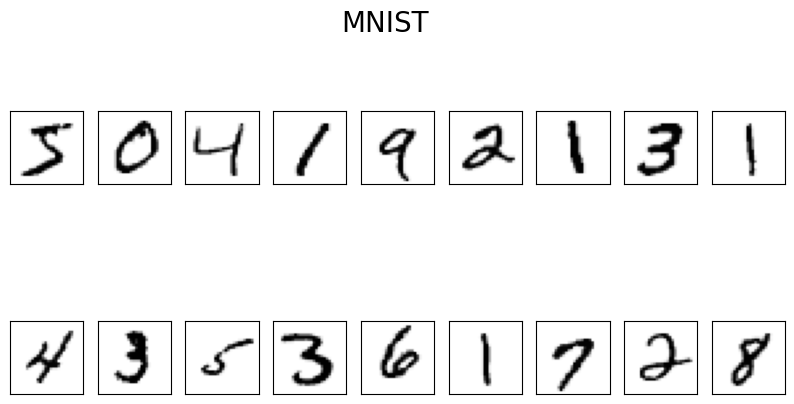

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [ ]:
# len()

In [ ]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


# Создание модели

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# альтернативная запись
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='sigmoid'),
])


# Компиляция модели

In [ ]:
# создание keras модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение нейронной сети

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print(train_labels[:5])
to_categorical(train_labels[:5])

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
1875 * 32

60000

In [ ]:
%%time
model.fit(train_images,
          to_categorical(train_labels),
          epochs=5,
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3720 - accuracy: 0.8888
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1963 - accuracy: 0.9403
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1516 - accuracy: 0.9532
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.9607
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9660
CPU times: user 35.4 s, sys: 1.74 s, total: 37.1 s
Wall time: 42.7 s


# Оценка обученности нейронной сети

In [ ]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9666


[0.11301230639219284, 0.9666000008583069]

# Сохранить и загрузить веса

In [ ]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
model.load_weights('model.h5')

# Запуск нейронной сети для выполнения предсказания

In [ ]:
import numpy as np

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 87ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [ ]:
predictions

array([[6.8888731e-08, 6.7144129e-10, 1.0306520e-05, 1.7779602e-06,
        1.4167734e-11, 1.0392592e-08, 8.5964832e-14, 9.9998748e-01,
        4.7457305e-09, 2.9540996e-07],
       [1.8699134e-07, 4.1040336e-04, 9.9958545e-01, 1.9613194e-06,
        7.8639734e-10, 8.5779561e-08, 1.6619504e-06, 2.0585278e-09,
        2.8985357e-07, 5.0945012e-11],
       [4.7564422e-06, 9.9623662e-01, 2.2700352e-03, 5.6002750e-06,
        2.8938546e-05, 7.9182075e-07, 4.5734100e-06, 1.4019661e-03,
        3.7315360e-05, 9.3970666e-06],
       [9.9314237e-01, 6.7393407e-06, 1.3723209e-03, 1.3351902e-05,
        2.2641018e-04, 2.4885521e-05, 7.2992867e-04, 1.6046253e-04,
        1.7792233e-06, 4.3217284e-03],
       [5.2272317e-06, 1.1974663e-08, 2.6570313e-05, 2.7317114e-08,
        9.9935549e-01, 8.9005844e-08, 2.6073585e-06, 1.6410673e-06,
        5.4792747e-07, 6.0771493e-04]], dtype=float32)

## Задание

1. Установите количество эпох равным 5, 10, 25, 20, 25, 30
2. Измените фукнцию активации первого слоя на sigmoid, softmax
3. Увеличить количество нейронов во 2м слое на 128
4. Сделайте выводы как изменение параметров нейронной сети сказывается на ее качестве